### LSTM System Identification

Name: Ananda Cahyo Wibowo<br />
NRP : 07111940000128 <br />
Undergrad Thesis Title : Data Driven Gas Lift Well And Network Optimization With Neural Network Based System Identification Using Modbus Simulator

Data Preparation

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU

from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import load_model
import seaborn as sns
#from datetime import datetime

#Read the csv file
df = pd.read_csv("upsampled_revv.csv")
df = pd.read_csv("upsampled_corr.csv")
#df = pd.read_csv("upsampled_corr_well.csv")
df = pd.read_csv("upsampled_corr_well22.csv")

#df = pd.read_csv("upsampled.csv")
df2 = df.drop(df.columns[0], axis=1)
data = df['glir'].to_numpy()

split = 0.9
epoch = 20
batchsize = 300
filename = "RNN_gor1_type4_" + f"{epoch}+{batchsize}" 

#x = df[['glir22','wc22','ch22','gor22']]
#y = df[['qo22']]

x = df[['gor']]
y = x

In [151]:
"""import pandas as pd

df = pd.read_csv("upsampled_revv.csv")

x = df[['glir22','wc22','ch22','gor22']]
y = df[['qo22']]

x[['glir22']].to_numpy()"""

'import pandas as pd\n\ndf = pd.read_csv("upsampled_revv.csv")\n\nx = df[[\'glir22\',\'wc22\',\'ch22\',\'gor22\']]\ny = df[[\'qo22\']]\n\nx[[\'glir22\']].to_numpy()'

In [152]:
df.describe()

,index,glir,qo,qt,wc,ch,gor,glir_old,tes,gor_old,Unnamed: 10,Unnamed: 11
count,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,4967.000000,1969.000000,1969.000000
mean,2484.000000,995.903322,77.586465,82.820298,6.653493,1254.354184,57100.770187,187.294916,14275.192547,5245.958657,149.914957,899.489741
std,1433.993724,747.187112,60.759708,65.292774,8.805085,287.919429,15676.469425,143.047992,3919.117356,15151.169446,120.750490,724.502940
min,1.000000,271.000000,1.000000,1.360000,0.140000,392.860000,30462.680000,54.200000,7615.670000,8.000000,54.200000,325.200000
25%,1242.500000,336.000000,13.300000,14.390000,1.540000,1060.000000,44607.680000,56.000000,11151.920000,400.000000,55.700000,334.200000
50%,2484.000000,793.000000,74.440000,80.380000,4.000000,1297.000000,53852.080000,146.000000,13463.020000,812.500000,95.200000,571.200000
75%,3725.500000,1491.000000,117.720000,124.560000,8.800000,1475.000000,73920.640000,281.200000,18480.160000,1955.640000,210.200000,1261.200000
max,4967.000000,3381.000000,248.370000,272.700000,60.000000,1694.000000,87820.880000,676.200000,21955.220000,107361.960000,533.600000,3201.600000


## Train Data

Preprocessing Data

In [153]:
scaler = StandardScaler()

df_for_x = scaler.fit_transform(x)
df_for_y = scaler.fit_transform(y)

X = df_for_x
Y = df_for_y

trainX, testX, trainY, testY = train_test_split(X,Y,test_size=1-split,random_state=123,shuffle=False)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))
print('testX shape == {}.'.format(testX.shape))
print('testY shape == {}.'.format(testY.shape))

lookback = 14
#win_len = int(len(x)/14)
win_len = 300
num_feature = np.shape(x)[1]

train_generator = TimeseriesGenerator(trainX,trainY,batch_size=win_len,length=lookback)
test_generator = TimeseriesGenerator(testX,testY,batch_size=win_len,length=lookback)
#np.shape(train_generator)
#np.shape(test_generator)
print(f"ukuran x train: {np.shape(trainX)} ukuran y train: {np.shape(trainY)}")
print(f"ukuran x test: {np.shape(testX)} ukuran y test: {np.shape(testY)}")
train_generator[0]

trainX shape == (4470, 1).
trainY shape == (4470, 1).
testX shape == (497, 1).
testY shape == (497, 1).
ukuran x train: (4470, 1) ukuran y train: (4470, 1)
ukuran x test: (497, 1) ukuran y test: (497, 1)


(array([[[0.4565384 ],
         [0.4565384 ],
         [0.4565384 ],
         ...,
         [0.4565384 ],
         [0.4565384 ],
         [0.4565384 ]],
 
        [[0.4565384 ],
         [0.4565384 ],
         [0.4565384 ],
         ...,
         [0.4565384 ],
         [0.4565384 ],
         [0.4565384 ]],
 
        [[0.4565384 ],
         [0.4565384 ],
         [0.4565384 ],
         ...,
         [0.4565384 ],
         [0.4565384 ],
         [0.4565384 ]],
 
        ...,
 
        [[1.74691801],
         [1.74691801],
         [1.74691801],
         ...,
         [1.95982921],
         [1.95982921],
         [1.95982921]],
 
        [[1.74691801],
         [1.74691801],
         [1.95982921],
         ...,
         [1.95982921],
         [1.95982921],
         [1.95982921]],
 
        [[1.74691801],
         [1.95982921],
         [1.95982921],
         ...,
         [1.95982921],
         [1.95982921],
         [1.95982921]]]),
 array([[0.4565384 ],
        [0.4565384 ],
        [0.

RNN LSTM Architecture & Training

In [154]:
# define the Autoencoder model

model = Sequential()
"""model.add(LSTM(14,activation='relu',input_shape=(lookback, num_feature), return_sequences=True))
#model.add(LeakyReLU(alpha=0.5))
#model.add(LSTM(7, return_sequences=True))
#model.add(LeakyReLU(alpha=0.5))
#model.add(Dropout(0.2))
model.add(LSTM(7,activation='relu', return_sequences=True))
model.add(LSTM(4,activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))"""

model.add(LSTM(180,activation='relu',input_shape=(lookback, num_feature)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', 'mape'])
model.summary("")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 180)               131040    
                                                                 
 dropout_9 (Dropout)         (None, 180)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 181       
                                                                 
Total params: 131,221
Trainable params: 131,221
Non-trainable params: 0
_________________________________________________________________


In [155]:
# fit the model
import tensorflow as tf
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

#model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
epoch = 300
history = model.fit(train_generator, validation_data = test_generator, epochs=epoch, batch_size=200, verbose=1,shuffle=False)
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_qo_type2_20+300')


Epoch 1/300
15/15 [==============================] - 2s 64ms/step - loss: 0.7974 - mse: 0.7974 - mae: 0.7547 - mape: 101.8957 - val_loss: 0.2029 - val_mse: 0.2029 - val_mae: 0.4104 - val_mape: 48.5032
Epoch 2/300
15/15 [==============================] - 1s 51ms/step - loss: 0.3465 - mse: 0.3465 - mae: 0.3874 - mape: 154.9890 - val_loss: 0.1470 - val_mse: 0.1470 - val_mae: 0.3548 - val_mape: 55.3499
Epoch 3/300
15/15 [==============================] - 1s 50ms/step - loss: 0.4900 - mse: 0.4900 - mae: 0.4068 - mape: 106.8357 - val_loss: 0.1704 - val_mse: 0.1704 - val_mae: 0.3733 - val_mape: 41.7345
Epoch 4/300
15/15 [==============================] - 1s 49ms/step - loss: 0.2013 - mse: 0.2013 - mae: 0.3704 - mape: 75.4921 - val_loss: 0.1174 - val_mse: 0.1174 - val_mae: 0.3005 - val_mape: 35.5810
Epoch 5/300
15/15 [==============================] - 1s 53ms/step - loss: 0.1709 - mse: 0.1709 - mae: 0.3163 - mape: 95.1254 - val_loss: 0.0730 - val_mse: 0.0730 - val_mae: 0.1770 - val_mape: 24.18

In [156]:
filename = "model_SIMPLE_GOR2_90"
model.save(filename)

INFO:tensorflow:Assets written to: model_SIMPLE_GOR2_90\assets


INFO:tensorflow:Assets written to: model_SIMPLE_GOR2_90\assets


In [157]:
#from tensorflow.keras.models import load_model
#model = load_model("RNN_model_resolved")

Weights and Biasses

[0.797444760799408, 0.34649771451950073, 0.49000969529151917, 0.20125041902065277, 0.17091470956802368, 0.14534936845302582, 0.11473407596349716, 0.09110584110021591, 0.0778084248304367, 0.07777556031942368, 0.0831141248345375, 0.08531711995601654, 0.08506013453006744, 0.07965178787708282, 0.07627701759338379, 0.0689893513917923, 0.0666632130742073, 0.06529539823532104, 0.06559853255748749, 0.06215508654713631, 0.06292923539876938, 0.07357939332723618, 0.06367172300815582, 0.07786191254854202, 0.06828898191452026, 0.07235456258058548, 0.06685657799243927, 0.07259069383144379, 0.06593014299869537, 0.06762447953224182, 0.06202971190214157, 0.06924625486135483, 0.06397947669029236, 0.06760410219430923, 0.059143051505088806, 0.06150869280099869, 0.05559879168868065, 0.05963241681456566, 0.05478531867265701, 0.058276090770959854, 0.053520433604717255, 0.05743877589702606, 0.0516086108982563, 0.05598536133766174, 0.05283514782786369, 0.055185865610837936, 0.05105794593691826, 0.0550666227936

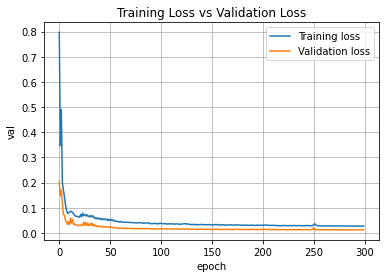

In [158]:
xx = np.arange(0,len(history.history['loss']))

print(history.history['loss'])
print(history.history['val_loss'])
print(xx)

plt.figure(1)
plt.plot(xx,history.history['loss'], label='Training loss')
plt.plot(xx,history.history['val_loss'], label='Validation loss')
plt.title("Training Loss vs Validation Loss")
plt.xlabel("epoch")
plt.ylabel("val")
plt.legend()
plt.grid()

train value

In [159]:
y_pred_train = model.predict_generator(train_generator)
df_pred_train = pd.concat([pd.DataFrame(y_pred_train), pd.DataFrame(trainX[:,:][lookback:])],axis=1)

#rev_trans_train = scaler.inverse_transform(df_pred_train)
rev_trans_train = scaler.inverse_transform(y_pred_train)

y_predict_train = np.resize(rev_trans_train[:,0],(len(rev_trans_train[:,0]),1))
y_real = y[lookback:]

df_final_train = pd.concat([pd.DataFrame(y_predict_train), pd.DataFrame(y_real)],axis=1)
df_final_train
y_real = y_real[:len(y_predict_train)] #adjusting shape
print(y_predict_train.shape)
print(y_real.shape)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_16044/2038070827.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_train = model.predict_generator(train_generator)


(4456, 1)
(4456, 1)


Text(0.5, 1.0, 'NN Prediction Train')

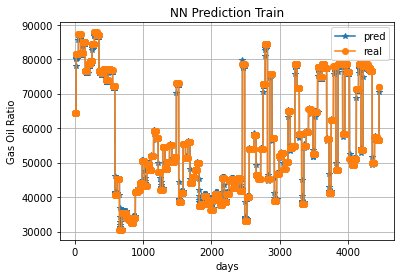

In [160]:
plt.plot(np.arange(0,len(y_predict_train)),y_predict_train,'-*',label='pred')
plt.plot(np.arange(0,len(y_real)),y_real,'-o',label='real')
plt.legend()
plt.grid()
plt.xlabel("days")
plt.ylabel("Gas Oil Ratio")
plt.title("NN Prediction Train")

In [161]:
a = y_real[0:len(y_predict_train)]
a.shape
#y_real.shape

(4456, 1)

Metric

Root Mean Square Error:
2290.65

R2 Value:
0.98


Text(0.5, 1.0, 'R2 Score= 0.98 of Training data')

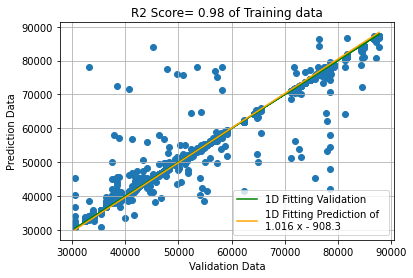

In [162]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real,y_predict_train)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real,y_predict_train)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real,y_predict_train)
plt.plot(y_real,y_real,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_train.flatten(),np.array(y_real).flatten(), 1))
myline = np.linspace(min(np.array(y_real)), max(np.array(y_real)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Training data")

### Validating

In [163]:
y_pred_test = model.predict_generator(test_generator)
rev_trans_test = scaler.inverse_transform(y_pred_test)

y_predict_test = np.resize(rev_trans_test[:,0],(len(rev_trans_test[:,0]),1))
y_real_test = y[lookback:]

df_final_test = pd.concat([pd.DataFrame(y_predict_test), pd.DataFrame(y_real_test)],axis=1)
df_final_test

y_real_test = y_real_test[len(y_predict_train)+lookback:] #adjusting shape

print(y_predict_test.shape)
print(y_real_test.shape)

(483, 1)
(483, 1)


C:\Users\ASUS\AppData\Local\Temp/ipykernel_16044/2788234103.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred_test = model.predict_generator(test_generator)


Text(0.5, 1.0, 'NN Prediction Validation')

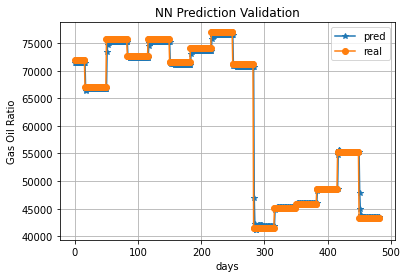

In [164]:
plt.plot(np.arange(0,len(y_predict_test)),y_predict_test,'-*',label='pred')
plt.plot(np.arange(0,len(y_real_test)),y_real_test,'-o',label='real')
plt.grid()
plt.legend()
plt.xlabel("days")
plt.ylabel("Gas Oil Ratio")
plt.title(f"NN Prediction Validation")

In [165]:
y_real_test.shape
#y_predict_test.shape

(483, 1)

Metric

Root Mean Square Error:
1689.28

R2 Value:
0.98


Text(0.5, 1.0, 'R2 Score= 0.98 of Validation data')

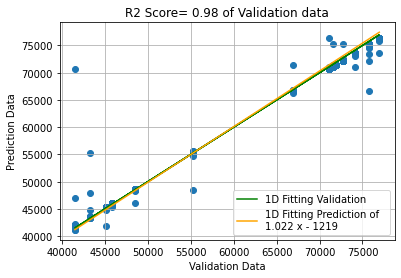

In [166]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_real_test,y_predict_test)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:")
print(round(RMSE,2))

r2 = r2_score(y_real_test,y_predict_test)
print("\nR2 Value:")
print(round(r2,2))

plt.scatter(y_real_test,y_predict_test)
plt.plot(y_real_test,y_real_test,'g',label = '1D Fitting Validation')

mymodel = np.poly1d(np.polyfit(y_predict_test.flatten(),np.array(y_real_test).flatten(), 1))
myline = np.linspace(min(np.array(y_real_test)), max(np.array(y_real_test)))
plt.plot(myline, mymodel(myline), color="orange", label=f'1D Fitting Prediction of {mymodel}')

plt.grid()
plt.legend()
plt.xlabel("Validation Data")
plt.ylabel("Prediction Data")
plt.title(f"R2 Score= {round(r2,2)} of Validation data")

In [167]:
a = scaler.inverse_transform(train_generator[0][0])
a

array([[[64256.96],
        [64256.96],
        [64256.96],
        ...,
        [64256.96],
        [64256.96],
        [64256.96]],

       [[64256.96],
        [64256.96],
        [64256.96],
        ...,
        [64256.96],
        [64256.96],
        [64256.96]],

       [[64256.96],
        [64256.96],
        [64256.96],
        ...,
        [64256.96],
        [64256.96],
        [64256.96]],

       ...,

       [[84483.52],
        [84483.52],
        [84483.52],
        ...,
        [87820.88],
        [87820.88],
        [87820.88]],

       [[84483.52],
        [84483.52],
        [87820.88],
        ...,
        [87820.88],
        [87820.88],
        [87820.88]],

       [[84483.52],
        [87820.88],
        [87820.88],
        ...,
        [87820.88],
        [87820.88],
        [87820.88]]])

## IMPLEMENTATION

1/1 [==============================] - 0s 146ms/step
[0] (14)= [1, 2, 2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 2, 55]
1/1 [==============================] - 0s 24ms/step
[1] (14)= [2, 3, 1, 2, 0, 1, 3, 2, 2, 3, 2, 55, 69362.875, 54]
1/1 [==============================] - 0s 33ms/step
[2] (14)= [1, 2, 0, 1, 3, 2, 2, 3, 2, 55, 69362.875, 54, 69304.26, 45]
1/1 [==============================] - 0s 24ms/step
[3] (14)= [0, 1, 3, 2, 2, 3, 2, 55, 69362.875, 54, 69304.26, 45, 69907.06, 11]
1/1 [==============================] - 0s 24ms/step
[4] (14)= [3, 2, 2, 3, 2, 55, 69362.875, 54, 69304.26, 45, 69907.06, 11, 64501.13, 49]
1/1 [==============================] - 0s 24ms/step
[5] (14)= [2, 3, 2, 55, 69362.875, 54, 69304.26, 45, 69907.06, 11, 64501.13, 49, 59798.137, 59]
1/1 [==============================] - 0s 32ms/step
[6] (14)= [2, 55, 69362.875, 54, 69304.26, 45, 69907.06, 11, 64501.13, 49, 59798.137, 59, 56632.04, 74]
1/1 [==============================] - 0s 32ms/step
[7] (14)= [69362.875, 54, 693

Text(0.5, 1.0, 'Prediction of Well Dynamics')

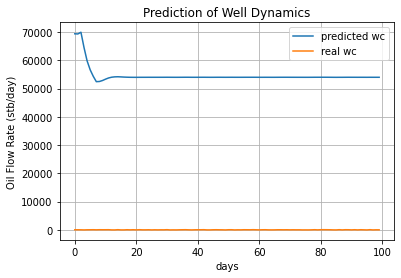

In [14]:
import numpy as np
import random
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import load_model
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_new\RNN_qo_type7_100+14')
#model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_qo_type2_20+300')
model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\RNN_params_type4_20+300')
model = load_model(r'C:\Users\ASUS\Documents\AllThingsPython\GLO_NN\NNModel_ann\model_SIMPLE_WC1_90')

o = list(np.ones(14)*10)
o = []
for a in range(0,14):
    o.append(random.randint(0,3))

tot = np.stack((o),axis=0).reshape(1,-1,1)

scaler = StandardScaler()
scale = StandardScaler().fit(y)
SS = scale.fit_transform(y)
tot.shape
otemp = o
#x = 'glir11','wc11','ch11','gor11']]
t=0
value_features = []
value_pred = []
qt_tot = []
qw_tot = []
import math
while t<100:    
    otemp.append(random.randint(5,90))

    o = otemp[-14:]

    tot = np.stack((o),axis=0).reshape(1,-1,1)
    #print(tot)
    Tot = scaler.fit_transform(tot[0])
    Tot = Tot.reshape(1,14,1)
    s = model.predict(Tot)
    S = scale.inverse_transform(s)[0][0]
    
    if t>200:
        otemp.append(100*(((0.2)/(1+200*(math.exp(-0.00001*t))))))
    else:
        otemp.append(S)

    current = o[-1]
    #otemp.append(S)
    print(f"[{t}] ({len(o)})= {o}")
    #print(f"[{t}]: {o}")
    #print(o)
    

    value_pred.append(abs(S))
    value_features.append(current)
    t+=1

"""header = ['glir11','wc11','ch11','gor11']
dff = pd.concat([pd.DataFrame(value_pred,columns=['pred qo']), pd.DataFrame(value_features,columns=header),
    pd.DataFrame(qt_tot,columns=['pred qt']), pd.DataFrame(qw_tot,columns=['pred qw'])],axis=1)"""

import matplotlib.pyplot as plt

#plt.plot(dff[['glir11']],label='predicted glir')
plt.plot(value_pred,label='predicted wc')
plt.plot(value_features,label='real wc')
#plt.plot(qt_tot,label='predicted qt')
#plt.plot(qw_tot,label='predicted qw')
plt.legend()
plt.grid()
plt.xlabel('days')
plt.ylabel('Oil Flow Rate (stb/day)')
plt.title("Prediction of Well Dynamics")

#dff
